In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

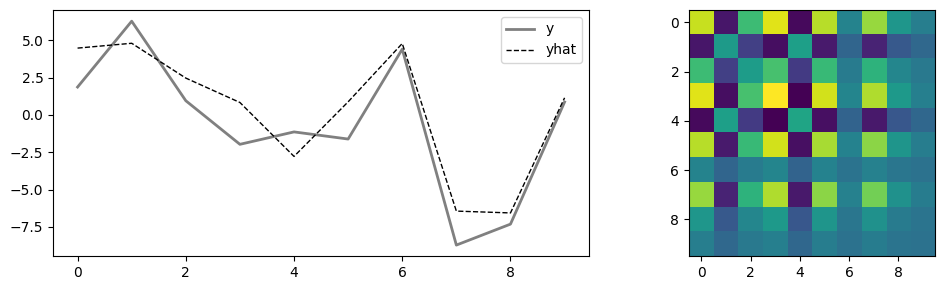

In [40]:
# homoschedasticity and no autocorrelation
np.random.seed(42)
n, p = 10, 3
X = np.random.randn(n, p)
beta = np.array([2, -1, 3])
y = X @ beta + np.random.randn(n) * 2  # Adding noise

# fit OLS model
beta_hat = np.linalg.pinv(X.T @ X) @ X.T @ y
y_hat = X @ beta_hat

# calc residuals
res = y - y_hat

# Compute Variance-Covariance Matrix of Residuals
res_cov = (res[:, None] @ res[None, :]) / (n - p)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11, 3))

axs[0].plot(y,  color='grey', lw=2,label='y',)
axs[0].plot(y_hat, ls='--', color='k', lw=1, label='yhat')
axs[0].legend()

axs[1].imshow(res_cov)

fig.tight_layout()

   Beta OLS  Beta GLS    SE OLS    SE GLS
0  1.280378  1.256301  1.177902  0.562446
1 -1.352201 -1.352715  0.850151  0.363356
2  2.041147  2.128673  0.829176  0.471221


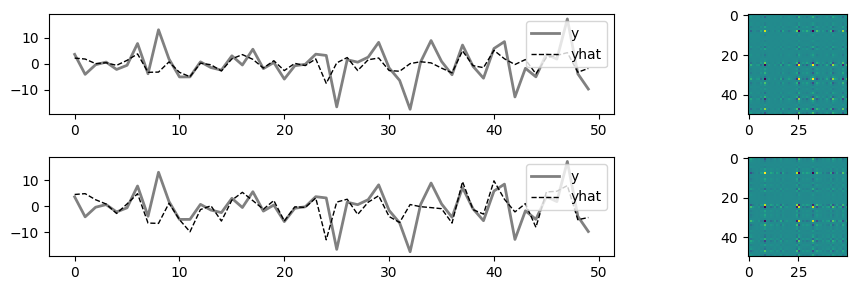

In [45]:
# heteroschedasticity and no autocorrelation
np.random.seed(42)
n, p = 50, 3
X = np.random.randn(n, p)
beta = np.array([2, -1, 3])
y = X @ beta + np.random.randn(n) * 2  # Adding noise

n_het = int(.3 * n)
p_het = np.random.randint(n, size=n_het)
y[p_het] = y[p_het] + np.random.randn(n_het) * 10

# fit OLS model
beta_hat_ols = np.linalg.pinv(X.T @ X) @ X.T @ y
y_hat_ols = X @ beta_hat_ols

# calc residuals OLS
res_ols = y - y_hat_ols
res_cov_ols = (res_ols[:, None] @ res_ols[None, :]) / (n - p)

res_var = res_ols ** 2
W = np.linalg.pinv(np.diag(res_var))

# fit GLS model
beta_hat_gls = np.linalg.pinv(X.T @ W @ X) @ X.T @ W @ y
y_hat_gls = X @ beta_hat

# calc residuals GLS
res_gls = y - y_hat_gls
res_cov_gls = (res_gls[:, None] @ res_gls[None, :]) / (n - p)

# Compute Variance-Covariance Matrices for OLS and GLS
sigma2_ols = (res_ols.T @ res_ols) / (n - p)
cov_ols = sigma2_ols * np.linalg.pinv(X.T @ X)

sigma2_gls = (res_gls.T @ res_gls) / (n - p)
cov_gls = sigma2_gls * np.linalg.pinv(X.T @ W @ X)

# Extract standard errors (square root of diagonal elements)
se_ols = np.sqrt(np.diag(cov_ols))
se_gls = np.sqrt(np.diag(cov_gls))

# Compare Beta Estimates and Standard Errors
df_comparison = pd.DataFrame({
    "Beta OLS": beta_hat_ols,
    "Beta GLS": beta_hat_gls,
    "SE OLS": se_ols,
    "SE GLS": se_gls
})

print(df_comparison)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(11, 3))

axs[0, 0].plot(y,  color='grey', lw=2,label='y',)
axs[0, 0].plot(y_hat_ols, ls='--', color='k', lw=1, label='yhat')
axs[0, 0].legend()

axs[0, 1].imshow(res_cov_ols)

axs[1, 0].plot(y,  color='grey', lw=2,label='y',)
axs[1, 0].plot(y_hat_gls, ls='--', color='k', lw=1, label='yhat')
axs[1, 0].legend()

axs[1, 1].imshow(res_cov_gls)

fig.tight_layout()